In [0]:
import numpy as np
import warnings
import matplotlib.pyplot as plt
import random
warnings.filterwarnings("ignore")

# 1. ADAM

## Exercice 1

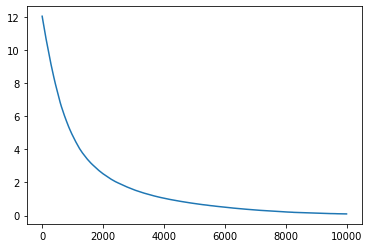

Done. ( 10000 iterations. )
||AX - b|| final :  0.09787833739769868


In [2]:
# Require: α: Stepsize
# Require: β1, β2 ∈ [0, 1): Exponential decay rates for the moment estimates
# Require: f(θ): Stochasticd objective function with parameters θ
# Require: θ0: Initial parameter vector
# m0 ← 0 (Initialize 1st moment vector)
# v0 ← 0 (Initialize 2nd moment vector)
# t ← 0 (Initialize timestep)
# while θt not converged do
# t ← t + 1
# gt ← ∇θft(θt−1) (Get gradients w.r.t. stochastic objective at timestep t)
# mt ← β1 · mt−1 + (1 − β1) · gt (Update biased first moment estimate)
# vt ← β2 · vt−1 + (1 − β2) · g_2_t (Update biased second raw moment estimate)
# mb t ← mt/(1 − β_t_1) (Compute bias-corrected first moment estimate)
# vbt ← vt/(1 − β_t_2) (Compute bias-corrected second raw moment estimate)
# θt ← θt−1 − α · mb t/(√vbt + eps) (Update parameters)
# end while
# return θt (Resulting parameters)

# Problem : Least squares with regularization |Ax - b|**2 + lambda * R(x)


class AdamMSE:
  """Adam solver for MSE problems."""

  def __init__(self, step, init, batch_size, b1=0.9, b2=0.999, max_it=10000,\
               eps=0.001, lamb=0.01, delta=0.1, gamma=0.01, plot=False):
    self.step = step
    self.x = init
    self.batch_size = batch_size
    self.b1 = b1
    self.b2 = b2
    self.max_it = max_it
    self.eps = eps
    
    self.lamb = lamb
    self.delta = delta
    self.gamma = gamma

    self.plot = plot

  def fit(self, A, b, reg=""):
    grad = self.grad
    if reg == "L2":
      grad = self.gradL2
    if reg == "L1":
      grad = self.gradL1
    if reg == "Enet":
      grad = self.elastic
    
    m_t = np.zeros(self.x.shape)
    v_t = np.zeros(self.x.shape)
    t = 0
    theta_t = self.x
    prev_theta = np.ones(self.x.shape) * float("inf")
    
    progression = []

    while t < self.max_it and np.linalg.norm(theta_t - prev_theta) > self.eps:
      t+=1
      g_t = grad(theta_t, A, b)
      m_t = self.b1 * m_t + (1 - self.b1) * g_t
      v_t = self.b2 * v_t + (1 - self.b2) * g_t**2
      mb_t = m_t / (1 - self.b1**t)
      vb_t = v_t / (1- self.b2**t)
      prev_theta = theta_t
      theta_t = theta_t - self.step * mb_t/(np.sqrt(vb_t) + 10**-8)
      if(self.plot):
        progression += [np.linalg.norm(A @ theta_t - b)]

    if(self.plot):
      plt.plot(np.arange(t), progression)
      plt.show()
    
    self.x = theta_t
    
    print("Done. (", t, "iterations. )")
  
  def grad(self, X, A, b):
    # random.sample(max, n) create n differents numbers from 0 to max excluded
    col = random.sample(range(X.shape[0]), self.batch_size)
    res = np.zeros(X.shape)
    for i in col:
      res += 2 * A[i, :] * (A[i, :] @ X - b[i])
    return res
  
  def gradL2(self, X, A, b):
    col = random.sample(range(X.shape[0]), self.batch_size)
    res = np.zeros(X.shape)
    for i in col:
      res += 2 * A[i, :] * (A[i, :] @ X - b[i]) + X * self.lamb
    return res
  
  def gradL1(self, X, A, b):
    col = random.sample(range(X.shape[0]), self.batch_size)
    res = np.zeros(X.shape)

    huber = np.zeros(X.shape)
    for i in range(len(huber)):
      if np.abs(X[i]) < self.delta:
        huber[i] = X[i]
      else:
        huber[i] = self.delta * (X[i] / abs(X[i]))
    for i in col:
      res += 2 * A[i, :] * (A[i, :] @ X - b[i]) + huber * self.lamb
    return res
  
  def elastic(self, X, A, b):
    col = random.sample(range(X.shape[0]), self.batch_size)
    res = np.zeros(X.shape)

    huber = np.zeros(X.shape)
    for i in range(len(huber)):
      if np.abs(X[i]) < self.delta:
        huber[i] = X[i]
      else:
        huber[i] = self.delta * (X[i] / abs(X[i]))
    for i in col:
      res += 2 * A[i, :] * (A[i, :] @ X - b[i]) + huber * self.lamb + \
             X * self.lamb * self.gamma
    return res

# Exercice 1 -------------------------------------------------------------------
A = np.random.normal(0, 0.1, (200, 200))

x_init = np.random.choice([0, 1], size=(200,), p=[0.8, 0.2])
b = A @ x_init


method1 = AdamMSE(0.001, np.random.random(A.shape[1]), 20, plot=True)
method1.fit(A, b)
print("||AX - b|| final : ", np.linalg.norm(A @ method1.x - b))

## Exercice 2

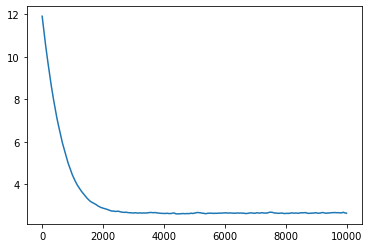

Done. ( 10000 iterations. )
||AX - b|| final :  2.6275031601506162


In [3]:
# Parameter "reg" of Adam.solve has been added
# takes value in {"L1", "L2", "MSE", "Enet"}

method2 = AdamMSE(0.001, np.random.random(A.shape[1]), 20, plot=True)
method2.fit(A, b, reg="L2")
print("||AX - b|| final : ", np.linalg.norm(A @ method2.x - b))

## Exercice 3

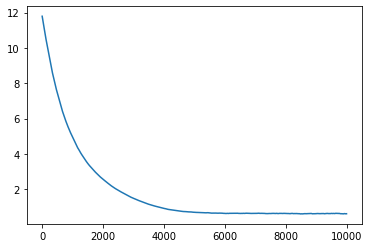

Done. ( 10000 iterations. )
||AX - b|| final :  0.6129878634196507


In [4]:
method3 = AdamMSE(0.001, np.random.random(A.shape[1]), 20, plot=True)
method3.fit(A, b, reg="L1")
print("||AX - b|| final : ", np.linalg.norm(A @ method3.x - b))

## Exercice 4

In [5]:
x_mean = np.zeros(A.shape[1])

for i in range(10):
  method4 = AdamMSE(0.001, np.random.random(A.shape[1]), 20, plot=False)
  method4.fit(A, b)
  x_mean += method4.x

x_mean /= 10
print("||AX - b|| final : ", np.linalg.norm(A @ x_mean - b))

Done. ( 10000 iterations. )
Done. ( 10000 iterations. )
Done. ( 10000 iterations. )
Done. ( 10000 iterations. )
Done. ( 10000 iterations. )
Done. ( 10000 iterations. )
Done. ( 10000 iterations. )
Done. ( 10000 iterations. )
Done. ( 10000 iterations. )
Done. ( 10000 iterations. )
||AX - b|| final :  0.09199838571186848


# Descente de gradient par coordonnées

## Exercice 5

Lemma 1 - page 4

GS-s coordinate decision rule is the simplest to implement.
Therefore we will only implement this rule.

(200, 200)
(200,)


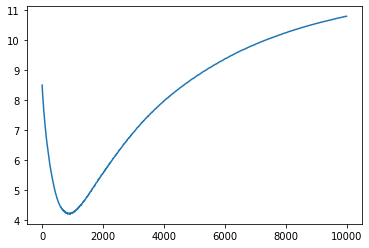

Done. ( 10000 iterations. )


In [20]:
# Initialize: α0 := 0 ∈ Rn.
# for t = 0, 1, . . . , until convergence do
#   Select coordinate it as in GS-s, GS-r, or GS-q.
#   Find α+_it via gradient (10) or line-search (11).
#   Compute α(t+1)_it as in (12).
# end for

class SDG:
  def __init__(self, step, lamb=0.01, eps=0.001, max_it=10, plot=False):
    self.step = step
    self.lamb = lamb
    self.eps = eps
    self.max_it = max_it
    self.plot = plot

    self.x = None

  def fit(self, A, b):
    self.A = A
    self.b = b

    a_prev = np.ones(A.shape[1]) * float("inf")
    a_next = np.zeros(A.shape[1])

    t = 0

    progression = []

    while t < self.max_it :
      a_prev = a_next
      i = self.gs_s(a_next)
      grad = 2 * self.A[:, i].T @ (self.A[:, i] * a_next[i] - self.b)

      a_plus = self.S(a_next[i] - self.step * grad, self.lamb * self.step)
      if a_next[i] * a_plus >= 0:
        a_next[i] = a_plus
      else:
        a_next[i] = 0
      t+=1
      if(self.plot):
        progression += [np.linalg.norm(A @ a_next - b)]

    if(self.plot):
      plt.plot(np.arange(t), progression)
      plt.show()
    
    self.x = a_next
    
    print("Done. (", t, "iterations. )")

  def gs_s(self, alpha):
    good_i = 0
    best = -1
    for i in range(self.A.shape[1]):
      current = abs(self.s(alpha, i))
      # print(current.shape)

      if current > best:
        best = current
        good_i = i
    return good_i
  
  def S(self, x, lamb):
    if abs(x) >= lamb:
      return x - lamb * (x/abs(x))
    else:
      return 0
  
  def s(self, alpha, i):
    grad = 2 * self.A[:, i].T @ (self.A[:, i] * alpha[i] - self.b)

    if alpha[i] == 0:
      return self.S(grad, self.lamb)
    else:
      return grad + self.lamb * (alpha[i]/abs(alpha[i]))

SDG1 = SDG(0.01, max_it=10000, plot=True)
SDG1.fit(A, b)


## Exercice 6

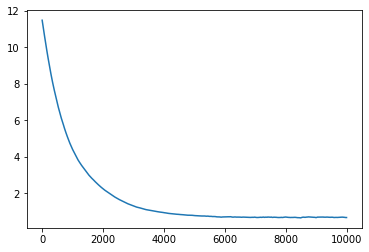

Done. ( 10000 iterations. )
||AX - b|| final :  0.6650656819657347


In [7]:
method5 = AdamMSE(0.001, np.random.random(A.shape[1]), 20, plot=True)
method5.fit(A, b, reg="Enet")
print("||AX - b|| final : ", np.linalg.norm(A @ method5.x - b))

Question 6 : Il faut choisir les paramètres par validation croisée.